In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
train_total_data = np.loadtxt('train/train_data.dat')

In [3]:
train_total_data_df = pd.DataFrame({
    'b':   train_total_data[:,0],  'N':    train_total_data[:,1],  'p':       train_total_data[:,2],
    'w':   train_total_data[:,3],  'dmin': train_total_data[:,4],  'sigmak':  train_total_data[:,5],
    'Tsw': train_total_data[:,6],  'Tk':   train_total_data[:,7],  'etask':   train_total_data[:,8],
    'aL':  train_total_data[:,9],  'aH':   train_total_data[:,10], 'zetasN':  train_total_data[:,11],
    'Tp':  train_total_data[:,12], 'wz':   train_total_data[:,13], 'lambdaz': train_total_data[:,14],
    
    'radius_mean': train_total_data[:,15], 'radius_std': train_total_data[:,16]})

train_total_data_df.head()

b          N         p         w      dmin    sigmak       Tsw  \
0  11.058657  19.502126  0.188174  0.848703  1.449189  0.428416  0.140822   
1  11.783539  10.290175 -0.574485  0.943464  0.583045  1.854881  0.156197   
2  12.832892  14.280251 -0.437695  1.216814  0.629890  1.546940  0.160958   
3   3.753438  15.741098  0.476016  1.091691  1.434893  1.494371  0.143423   
4  12.593027  19.825657  0.697347  0.886549  1.192280  0.907489  0.161089   

         Tk     etask        aL        aH    zetasN        Tp        wz  \
0  0.179008  0.127089 -1.125277  1.718508  0.157207  0.166632  0.118011   
1  0.163268  0.023839 -0.379098 -0.530903  0.094801  0.299463  0.058860   
2  0.143790  0.021283  0.414159 -0.393557  0.049526  0.187281  0.077732   
3  0.277653  0.080583 -1.484047  0.896593  0.048334  0.217868  0.106142   
4  0.297931  0.091507 -1.682895  0.790027  0.018566  0.289087  0.036880   

    lambdaz  radius_mean  radius_std  
0 -0.536845     9.864587    0.743577  
1  0.421238     7.304424    0.666246  
2 -0.687539     7.713427    0.724134  
3 -0.391620    12.454726    0.619016  
4  0.119766     9.121082    0.952381

Total correlation matrix


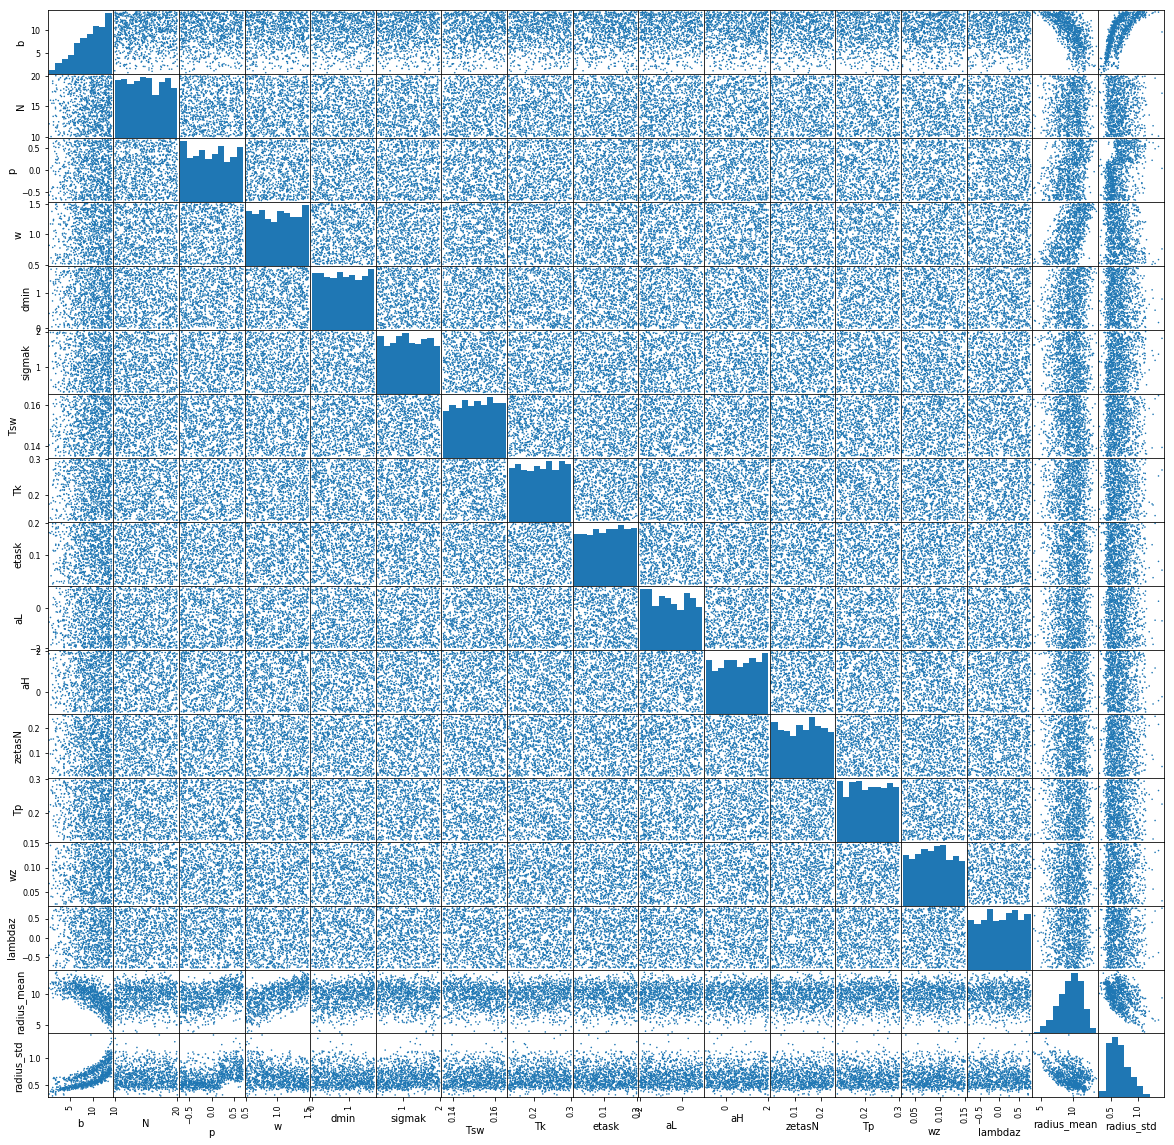

In [4]:
print('Total correlation matrix')
scatter_matrix(train_total_data_df, figsize = (20,20), alpha = 1, s = 10)
plt.show()

In [5]:
train_total_data_df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3)

Radius mean correlation matrix


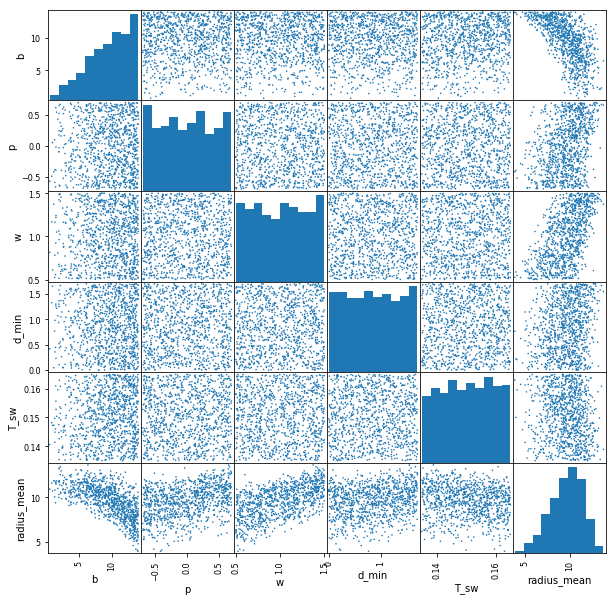

In [6]:
# Feature selection for radius mean model:
# [b, p, w, dmin, Tsw] = [0,2,3,4,6]

train_X_radius_mean = train_total_data[:,[0,2,3,4,6]]
train_y_radius_mean = train_total_data[:,-2]

train_radius_mean_df = pd.DataFrame({
    'b':     train_X_radius_mean[:,0], 'p':    train_X_radius_mean[:,1], 'w': train_X_radius_mean[:,2],
    'd_min': train_X_radius_mean[:,3], 'T_sw': train_X_radius_mean[:,4], 

    'radius_mean': train_y_radius_mean})

my_scatter = scatter_matrix(train_radius_mean_df, figsize = (10,10), alpha = 1, s = 10)

# Save the figure
#plt.savefig("scatter_mean.pdf")


print("Radius mean correlation matrix")
train_radius_mean_df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3)

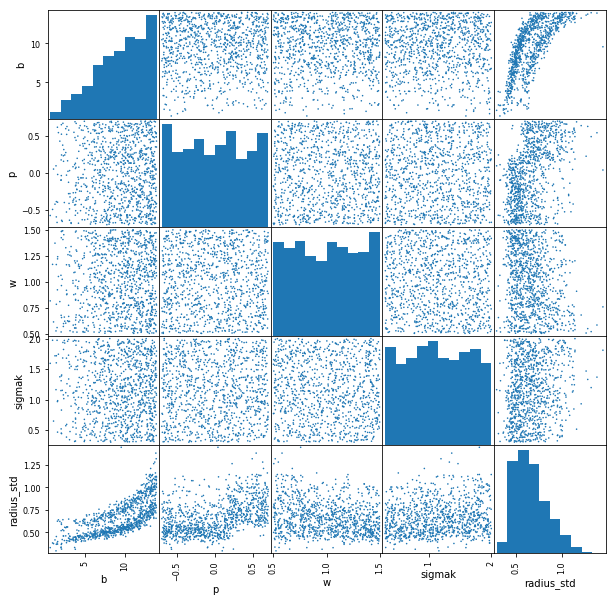

Radius std correlation matrix


In [7]:
# Feature selection for radius std model:
# [b, p, w, sigmak] = [0,2,3,5]

train_X_radius_std = train_total_data[:,[0,2,3,5]]
train_y_radius_std = train_total_data[:,-1]

train_radius_std_df = pd.DataFrame({
    'b': train_X_radius_std[:,0], 'p':      train_X_radius_std[:,1], 
    'w': train_X_radius_std[:,2], 'sigmak': train_X_radius_std[:,3],

    'radius_std': train_y_radius_std})

scatter_matrix(train_radius_std_df, figsize = (10,10), alpha = 1, s = 10)
plt.show()

print("Radius std correlation matrix")
train_radius_std_df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3)